In [57]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [58]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape: ', train_X.shape, train_Y.shape)
print('Testing data shape: ', test_X.shape, test_Y.shape)

Training data shape:  (60000, 28, 28) (60000,)
Testing data shape:  (10000, 28, 28) (10000,)


In [59]:
classes = np.unique(train_Y)
nclasses = len(classes)
print('Total number of outputs: ', nclasses)
print('Outputnclasses: ', classes)

Total number of outputs:  10
Outputnclasses:  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

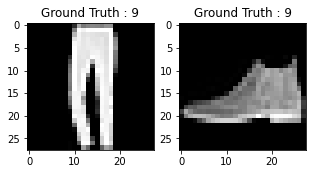

In [83]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

In [61]:
tr_x = train_X
ts_x = test_X
tr_y = train_Y
ts_y = test_Y

In [62]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [63]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255

In [64]:
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

print('Original label:', train_Y[0])
print('After conversion to one-hot', train_Y_one_hot[0])

Original label: 9
After conversion to one-hot [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [65]:
from sklearn.model_selection import train_test_split
train_X, valid_X, train_label, valid_label = train_test_split(train_X, train_Y_one_hot, test_size = 0.2, random_state = 13)

In [66]:
train_X.shape, valid_X.shape, train_label.shape, valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [67]:
import keras
from keras.models import Sequential, Input, Model 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

In [68]:
batch_size = 64
epochs = 20
num_classes = 10

In [69]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape=(28,28,1), padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))

fashion_model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))

fashion_model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1))                  
fashion_model.add(Dense(num_classes, activation = 'softmax'))

In [70]:
fashion_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [71]:
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 128)        

In [72]:
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 97s 128ms/step - loss: 0.6881 - accuracy: 0.7485 - val_loss: 0.3699 - val_accuracy: 0.8636
Epoch 2/20
750/750 [==============================] - 94s 126ms/step - loss: 0.3066 - accuracy: 0.8874 - val_loss: 0.2716 - val_accuracy: 0.9018
Epoch 3/20
750/750 [==============================] - 98s 130ms/step - loss: 0.2421 - accuracy: 0.9114 - val_loss: 0.2720 - val_accuracy: 0.9033
Epoch 4/20
750/750 [==============================] - 105s 140ms/step - loss: 0.2068 - accuracy: 0.9237 - val_loss: 0.2521 - val_accuracy: 0.9068
Epoch 5/20
750/750 [==============================] - 101s 135ms/step - loss: 0.1815 - accuracy: 0.9322 - val_loss: 0.2383 - val_accuracy: 0.9167
Epoch 6/20
750/750 [==============================] - 105s 140ms/step - loss: 0.1615 - accuracy: 0.9405 - val_loss: 0.2328 - val_accuracy: 0.9187
Epoch 7/20
750/750 [==============================] - 109s 146ms/step - loss: 0.1407 - accuracy: 0.9466 - val_loss: 0.2545 - va

In [73]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = 0)

In [74]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  0.5229184627532959
Test accuracy:  0.9156000018119812


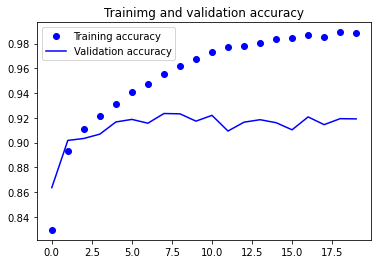

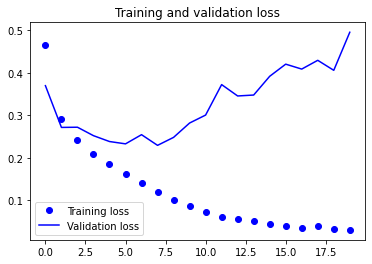

In [77]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Trainimg and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [78]:
batch_size = 64
epochs = 20
num_classes = 10

In [21]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size = (3, 3), activation = 'linear', input_shape=(28,28,1), padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D((2,2), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(64, (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))
fashion_model.add(MaxPooling2D(pool_size = (2,2), padding = 'same'))
fashion_model.add(Dropout(0.25))

fashion_model.add(Conv2D(128, (3, 3), activation = 'linear', padding = 'same'))
fashion_model.add(LeakyReLU(alpha = 0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
fashion_model.add(Dropout(0.4))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation = 'linear'))
fashion_model.add(LeakyReLU(alpha = 0.1)) 
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation = 'softmax'))

In [5]:
fashion_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [22]:
fashion_model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

In [23]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size = batch_size, epochs = epochs, verbose = 1, validation_data = (valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 99s 130ms/step - loss: 0.8623 - accuracy: 0.6755 - val_loss: 0.3927 - val_accuracy: 0.8614
Epoch 2/20
750/750 [==============================] - 98s 131ms/step - loss: 0.3925 - accuracy: 0.8565 - val_loss: 0.3264 - val_accuracy: 0.8808
Epoch 3/20
750/750 [==============================] - 139s 186ms/step - loss: 0.3316 - accuracy: 0.8775 - val_loss: 0.2813 - val_accuracy: 0.8988
Epoch 4/20
750/750 [==============================] - 142s 190ms/step - loss: 0.3054 - accuracy: 0.8860 - val_loss: 0.2624 - val_accuracy: 0.9042
Epoch 5/20
750/750 [==============================] - 142s 190ms/step - loss: 0.2836 - accuracy: 0.8949 - val_loss: 0.2521 - val_accuracy: 0.9066
Epoch 6/20
750/750 [==============================] - 140s 187ms/step - loss: 0.2629 - accuracy: 0.9021 - val_loss: 0.2406 - val_accuracy: 0.9122
Epoch 7/20
750/750 [==============================] - 118s 157ms/step - loss: 0.2597 - accuracy: 0.9018 - val_loss: 0.2479 - v

In [27]:
fashion_model.save("fashion_model_dropout.h5py")

INFO:tensorflow:Assets written to: fashion_model_dropout.h5py/assets


In [28]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose = 1)

313/313 [==============================] - 6s 19ms/step - loss: 0.2421 - accuracy: 0.9137


In [30]:
print('Test loss: ', test_eval[0])
print('Test accuracy: ', test_eval[1])

Test loss:  0.24206753075122833
Test accuracy:  0.9136999845504761


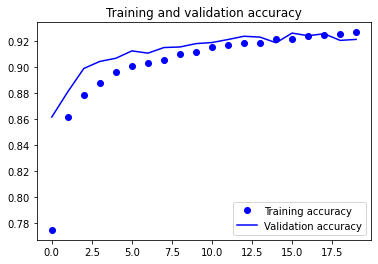

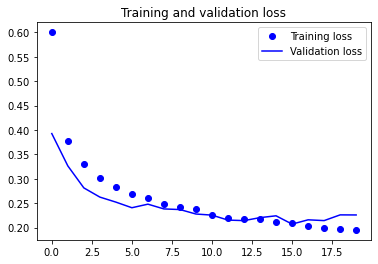

In [33]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [39]:
predictes_classes = fashion_model.predict(test_X)

In [40]:
predicted_classes = np.argmax(np.round(predictes_classes), axis = 1)

In [41]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9117 correct labels


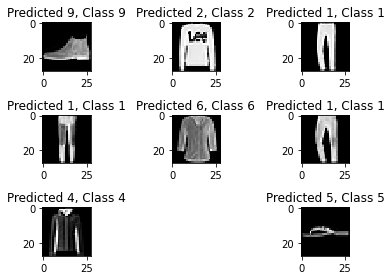

In [46]:
correct = np.where(predicted_classes == test_Y)[0]
# print("Found ", len(correct), " correct labels")
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_X[correct].reshape(28, 28), cmap = 'gray', interpolation = 'none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))    
    plt.tight_layout()

Found 883 incorrect labels


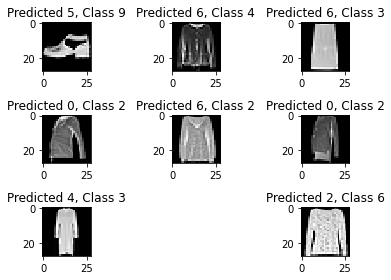

In [50]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()

In [51]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.83      0.83      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.93      0.78      0.85      1000
     Class 3       0.91      0.92      0.91      1000
     Class 4       0.81      0.91      0.86      1000
     Class 5       0.99      0.99      0.99      1000
     Class 6       0.74      0.78      0.76      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.99      0.98      0.98      1000
     Class 9       0.98      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

